In [7]:
import matplotlib.pyplot as plt
import numpy as np
from hercules.python_simulators.simple_battery import SimpleBattery

In [8]:
batt_dict = {
    "py_sim_type": SimpleBattery,
    "energy_capacity": 10,  # total capcity of the battery in MWh (4-hour 20 MW battery)
    "charge_rate": 2,  # charge rate of the battery in MW
    "discharge_rate": 2,  # discharge rate of the battery in MW
    "max_SOC": 0.9,  # upper boundary on battery SOC
    "min_SOC": 0.1,  # lower boundary on battery SOC
    "initial_conditions": {
        "SOC": 0.5  # initial state of charge of the battery in percentage of total size
    },
}
dt = 0.5
SB = SimpleBattery(batt_dict, dt)

In [9]:
time_start = 0
time_end = 3 * 3600
time_delta = dt
time = np.arange(time_start, time_end, time_delta)


def simulate(SB, time, available_power, signal):
    inputs = {
        "setpoints": {"battery": {"signal": 0}},
        "py_sims": {"inputs": {"available_power": 0}},
    }
    batt_power = np.zeros(len(time))
    batt_reject = np.zeros(len(time))
    batt_soc = np.zeros(len(time))

    for i in range(len(time)):
        inputs["setpoints"]["battery"]["signal"] = signal[i]
        inputs["py_sims"]["inputs"]["available_power"] = available_power[i]
        outputs = SB.step(inputs)
        batt_power[i] = outputs["power"]
        batt_reject[i] = outputs["reject"]
        batt_soc[i] = outputs["soc"]

    fig, ax = plt.subplots(3, 1, sharex="col", figsize=(12, 8))

    ax[0].plot(time, available_power, label="P_avail")
    ax[0].plot(time, signal, linestyle="dashed", label="Signal")
    # ax[0].plot(time, available_power - batt_power, linestyle="dotted", label="P_down_batt")
    # ax[0].plot(time, batt_reject, linestyle="dashdot", label="P_down_cont")
    ax[0].legend()
    ax[0].set_ylabel("Power [kW]")

    ax[1].hlines(
        [batt_dict["charge_rate"] * 1e3, -batt_dict["discharge_rate"] * 1e3],
        time_start,
        time_end,
        alpha=0.5,
        linewidth=0.5,
        color="black",
    )

    ax[1].plot(time, batt_power, label="P_batt")
    ax[1].plot(time, batt_reject, linestyle="dashed", label="P_reject")
    ax[1].legend()
    # ax[1].set_ylim([-1.5 * batt_dict["discharge_rate"] * 1e3, 1.5 * batt_dict["charge_rate"] * 1e3])
    ax[1].set_ylabel("Power [kW]")

    ax[2].hlines(
        [batt_dict["min_SOC"], batt_dict["max_SOC"]],
        time_start,
        time_end,
        alpha=0.5,
        linewidth=0.5,
        color="black",
    )

    ax[2].plot(time, batt_soc, label="SOC")
    ax[2].legend()
    ax[2].set_ylabel("SOC")
    ax[2].set_xlabel("Time [s]")

## State of Charge limits

The battery obeys its state of charge limits when asked to charge or discharge too much.

13.330985591074409
-0.1777151768294516
12.101226578043452
-0.146439684693064
12.084513323021838
-0.14603546225441733
12.069593069363577
-0.1456750768601296
12.055005249944315
-0.14532315157623543
12.040740098499782
-0.14497942211949066
12.026789787327743
-0.14464367258847233
12.01314668290388
-0.14431569322482574
11.999803339022037
-0.14399528017509056
11.986752492139658
-0.14368223530777868
11.973987056844635
-0.1433763660375007
11.961500121433232
-0.14307748515489038
11.949284943602152
-0.14278541066335038
11.937334946245528
-0.14249996561875378
11.925643713360387
-0.14222097797801325
11.914204986052368
-0.14194828044969654
11.903012658642751
-0.1416817103518042
11.89206077487404
-0.1414211094732991
11.881343524208546
-0.14116632394018325
11.87085523822077
-0.140917204086918
11.860590387080947
-0.1406736043300043
11.85001618314925
-0.1404228835408503
11.839609228966879
-0.14017634669460222
11.829409848582486
-0.13993493736563778
11.819413088020383
-0.1396985257453025
11.8096140610391

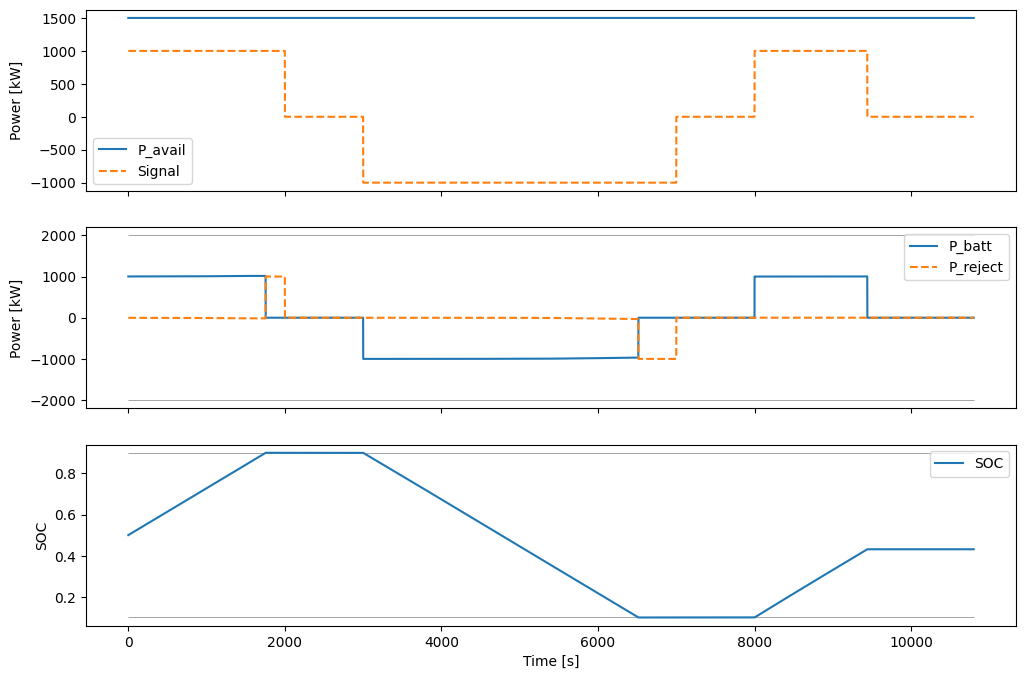

In [10]:
SB.E = 0.5 * 1e3 * 3600

available_power = 1.5e3 * np.ones(len(time))
signal = np.concatenate(
    [
        1e3 * np.ones(4000),
        np.zeros(2000),
        -1e3 * np.ones(8000),
        np.zeros(2000),
        1e3 * np.ones(2880),
        np.zeros(len(time) - 16000 - 2880),
    ]
)

simulate(SB, time, available_power, signal)

## Charging/Discharging rate limits

The battery obeys its charging/discharging limits when asked to charge or discharge more too rapidly.

0.5375462474730739
0.00011558238702491508
2.485239747329615e-08
33.327463977685966
-0.44428794207306055
27.096675450063685
-0.2936919281783048
27.0195196268769
-0.2920217763467008
26.94407291839616
-0.29039322617290964
26.87029285571225
-0.2888050552610366
26.798138050527996
-0.2872560811897529
26.72756816701758
-0.2857451600493732
26.65854389443075
-0.28427118502850135
26.59102692043325
-0.28283308507343463
26.524979905151213
-0.281429823587132
26.460134095197645
-0.2800554785339955
26.394023444942377
-0.2786577894448783
26.329276319248493
-0.2772923165980501
26.265859022073528
-0.2759581400669049
26.20373871005131
-0.27465436895408857
26.14288337041171
-0.2733801403678626
26.083261799476986
-0.2721346184398499
26.02484358173797
-0.27091699338188846
25.967599069471817
-0.26972648057289916
25.91149936291322
-0.26856231969395594
25.856516290933087
-0.26742377388154637
25.802622392244757
-0.2663101289272163
25.749790897091316
-0.2652206924976781
25.697995709426777
-0.2641547933922084
25.

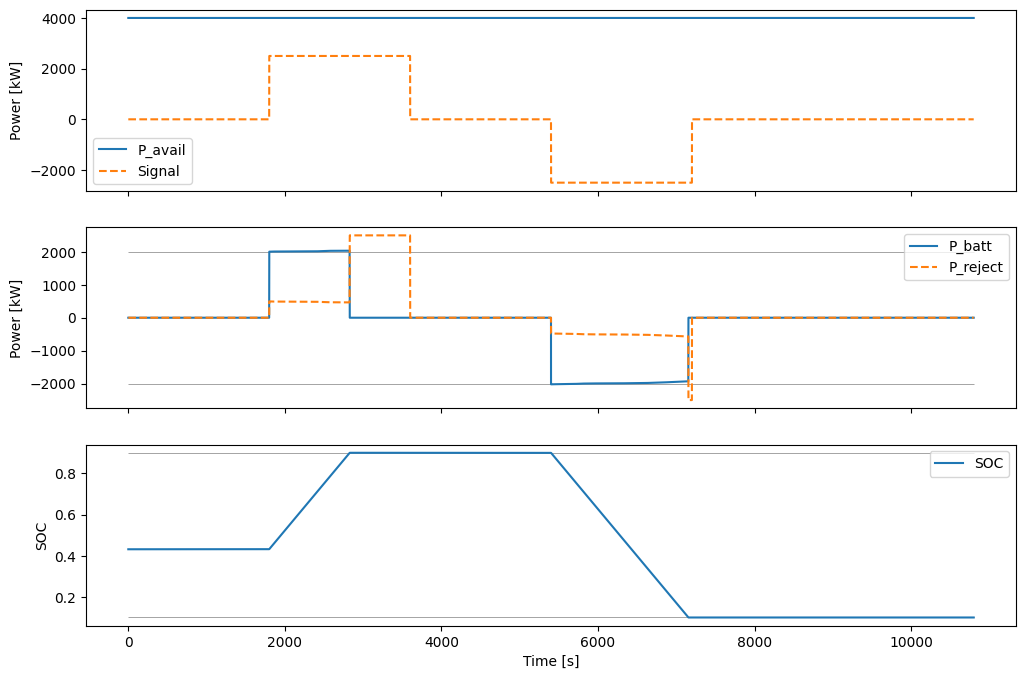

In [11]:
SB.E = 0.5 * 1e3 * 3600

available_power = 4e3 * np.ones(len(time))
signal = np.concatenate(
    [
        np.zeros(3600),
        2.5e3 * np.ones(3600),
        np.zeros(3600),
        -2.5e3 * np.ones(3600),
        np.zeros(2 * 3600),
    ]
)

simulate(SB, time, available_power, signal)

## Other limits

The battery does not charge with more than the available power even when signaled to do so.

71.08213371505371
2.0210678933935924
0.0574647272983384
0.0016338861719304987
4.6456045765808085e-05
1.320878254773561e-06
3.75566742150113e-08
64.49019009304538
1.6639790722215366
0.042934070263981994
0.001107787003093108
2.858317475329386e-05
7.375047061941586e-07
64.30264337235894
1.6546981304936708
0.042580300893405365
0.001095717696898646
2.819607288984116e-05
7.255689524754416e-07
64.11598693073984
1.645486743440415
0.042230132490658434
0.0010838033772415656
2.781496732495725e-05
7.138496584957466e-07
63.930213164168435
1.6363441709609106
0.041883518188114977
0.001072041643965349
2.743975073826732e-05
7.023418220342137e-07
63.768264428971634
1.6284416078628965
0.04158529472260852
0.001061958088484971
2.7119081096316222e-05
6.925361049070489e-07
63.61545392090375
1.6210220711791408
0.04130619831039439
0.001052547062499798
2.6820559014595347e-05
6.834297892055474e-07
63.46348919646152
1.6136608152341978
0.04102990963110642
0.001043251139435597
2.652633065736154e-05
6.74473994877189

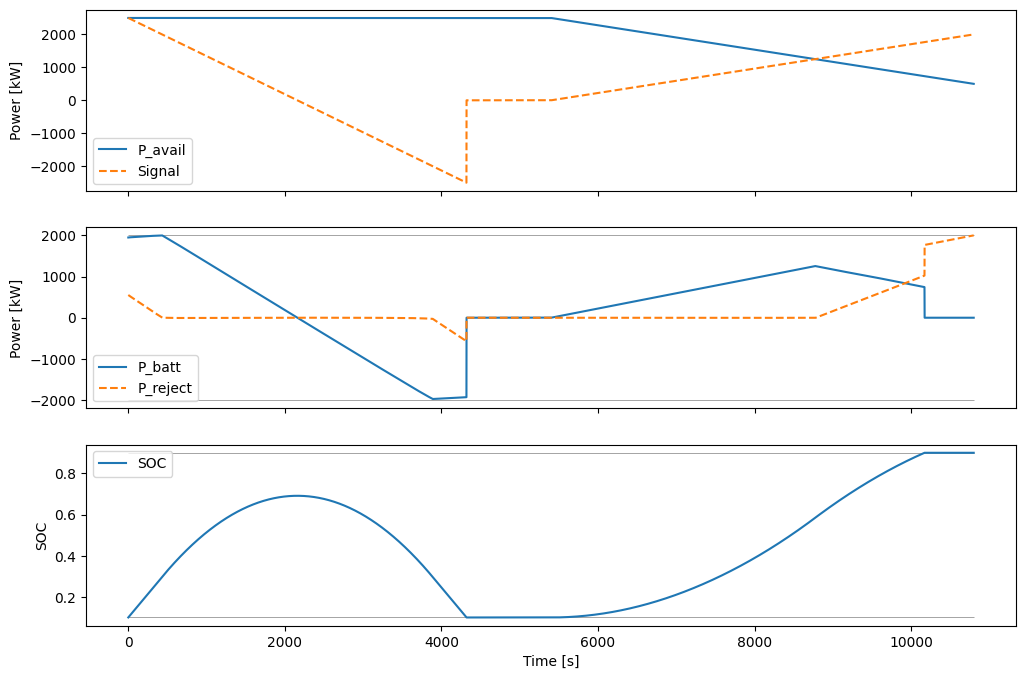

In [12]:
SB.E = 0.5 * 1e3 * 3600
available_power = 2.5e3 * np.ones(len(time)) + np.concatenate(
    [np.zeros(int((1 - 0.5) * len(time))), np.linspace(0, -2e3, int(0.5 * len(time)))]
)

signal = np.concatenate(
    [
        np.linspace(2.5e3, -2.5e3, int(0.4 * len(time))),
        np.zeros(int((1 - 0.4) * len(time))),
    ]
) + np.concatenate(
    [np.zeros(int((1 - 0.5) * len(time))), np.linspace(0, 2e3, int(0.5 * len(time)))]
)

simulate(SB, time, available_power, signal)